# Exploring Airbnb Market Trends

![NYC Skyline](img/nyc.jpg)

## Background

New York City is one of the most visited cities in the world, with a high number of Airbnb listings to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nigths to many months. 

## Objective

The objective of this analysis will be to take a closer look at the New York Airbnb market. 

## The Datasets

The information will be analyzed through the information from the following files and their corresponding fields: 

**data/airbnb_price.csv**
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

## Business Questions

- What is the average price, per night, of an Airbnb listing in NYC?
- How does the average price of an Airbnb listing, per month, compare to the private rental market?
- Haw many listings are there for each room type?
- How do Airbnb listing prices compare across the five NYC boroughs?


## Setting up the environment

The Numpy, Pandas, Matplotlib and Seaborn packages were loaded to elaborate the corresponding analysis. 

In [41]:
# Loading the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the datasets

Next, we can load the dataset from Airbnb listings in New York City. 

In [42]:
# Loading the price dataset
prices = pd.read_csv('data/airbnb_price.csv')
prices.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [43]:
# Loading the room_type dataset
room_types = pd.read_excel('data/airbnb_room_type.xlsx')
room_types.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [44]:
# Loading the last_review dataset
last_reviews = pd.read_csv('data/airbnb_last_review.tsv', delimiter = '\t')
last_reviews

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019
...,...,...,...
25204,36425863,Rusaa,July 07 2019
25205,36427429,H Ai,July 07 2019
25206,36438336,Ben,July 07 2019
25207,36442252,Blaine,July 07 2019


## Data Inspection and Cleaning Process

We will first inspect the information and integrity of each table. 

In [45]:
# Inspecting data types and information
display(prices.info())
display(room_types.info())
display(last_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


None

The three tables (`price`, `room_types` and `last_reviews`) all contain three columns and 25,209 entries. The fields match the expected information. 


For the purpose of the analysis, the `price` column was cleaned in order to convert it to a numeric data type. Additionally, the `room_type` was homologated as some of the categories were written in lower or uppercase. Finally, the `last_review` dates were converted to datetime types. 

In [46]:
# Removing the word 'dollars' from the price column
prices['price'] = prices['price'].str.strip(' dollars')

# Casting the price column as numeric
prices['price'] = prices['price'].astype(int)
prices.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  int64 
 2   nbhood_full  25209 non-null  object
dtypes: int64(2), object(1)
memory usage: 591.0+ KB


In [47]:
# Cleaning the 'room_type' column
room_types['room_type'] = room_types['room_type'].str.lower()
display(room_types['room_type'].unique())

# Changing to a categorical data type
room_types['room_type'] = room_types['room_type'].astype('category')
room_types.info()

array(['entire home/apt', 'private room', 'shared room'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   listing_id   25209 non-null  int64   
 1   description  25199 non-null  object  
 2   room_type    25209 non-null  category
dtypes: category(1), int64(1), object(1)
memory usage: 418.8+ KB


In [48]:
# Casting the last_review column to datetime type
last_reviews['last_review'] = pd.to_datetime(last_reviews['last_review'])
last_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   25209 non-null  int64         
 1   host_name    25201 non-null  object        
 2   last_review  25209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 591.0+ KB


## General Analysis

### Calculating average price of an Airbnb listing

In order to get an average price of rentals, we first inspect the summary statistics of the column and preview the information with a simple box plot. 

In [49]:
# Analysing the 'price' of listings
prices.describe()

,listing_id,price
count,2.520900e+04,25209.000000
mean,2.068922e+07,141.777936
std,1.102928e+07,147.349137
min,2.595000e+03,0.000000
25%,1.202273e+07,69.000000
50%,2.234391e+07,105.000000
75%,3.037669e+07,175.000000
max,3.645581e+07,7500.000000


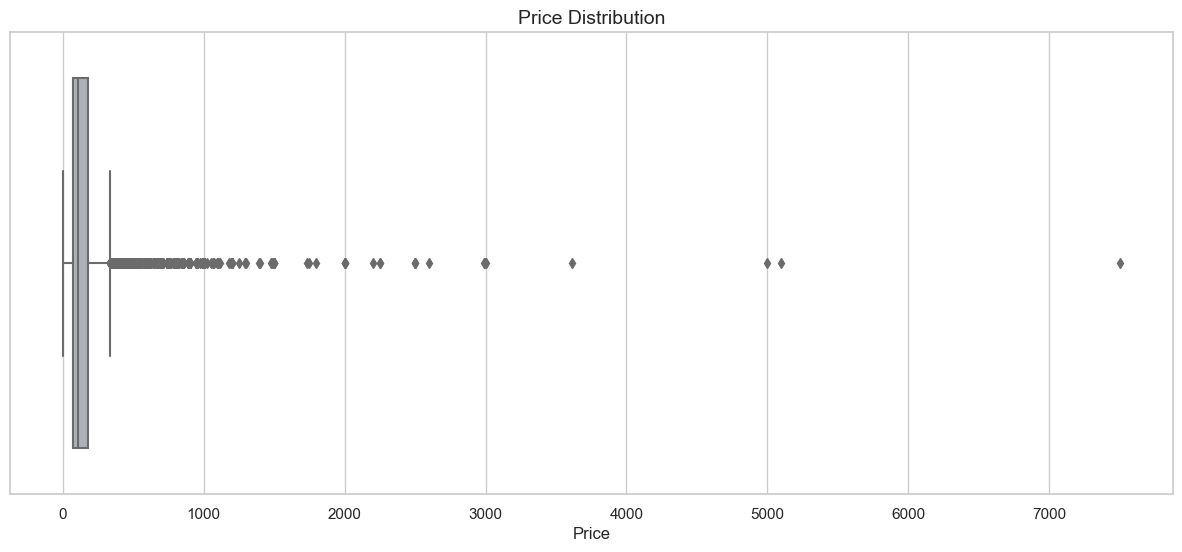

In [50]:
# Checking the distribution of the price
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.figure(figsize = (15, 6))
sns.boxplot(data = prices, x = 'price', color = '#acafba')
plt.title('Price Distribution', size = 14)
plt.xlabel('Price')
plt.show()

It can be seen that there are some bookings with \$0 dollars per night. It would be relevant to see why these bookings were not charged by the owners. However, for the purpose of this analysis, listings with zero cost will be removed.

In [51]:
# Removing extreme outliers
prices_no_outliers = prices[prices['price'] != 0]

# Calculating average price 
avg_price = prices_no_outliers['price'].mean().round(2)
avg_price

141.82

After removing these listings, we can now calculate the mean price. The average price of an Airbnb listing in New York is of $141.82 dollars. 

### Comparing costs to the private rental market

According to Zumper, a 1 bedroom apartment in New York City costs, on average, \$3100 per month. To compare to the market, we convert the per night prices of our listings into monthly costs. 

In [52]:
# Calculating 'price_per_month', assuming there are 365 days and divided equally in 12 months
prices_no_outliers['price_per_month'] = prices_no_outliers['price'] * 365 / 12
prices_no_outliers['price_per_month'] = prices_no_outliers['price_per_month'].round(2)

# Calculating the average price of the price_per_month column 
average_price_per_month = prices_no_outliers['price_per_month'].mean().round(2)
average_price_per_month

# Difference between the average cost of an Airbnb listing vs the private market
average_market_price_per_month = 3100
difference = average_price_per_month - average_market_price_per_month
difference = difference.round(2)
difference

1213.61

According to the data, an average price per month in an Airbnb listing consists of \$4,313.61 dollars. This means that there is a difference of \$1,213.61 compared to the private rental market. However, it is important to note that Airbnb offers a wide variety of options to rent from.  

### Room listings per room type

Now that the `room_type` has been cleaned, we can get the number of listings for each room type. 

In [53]:
# Getting the frequencies for each room type
room_frequencies = room_types['room_type'].value_counts()
room_frequencies

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

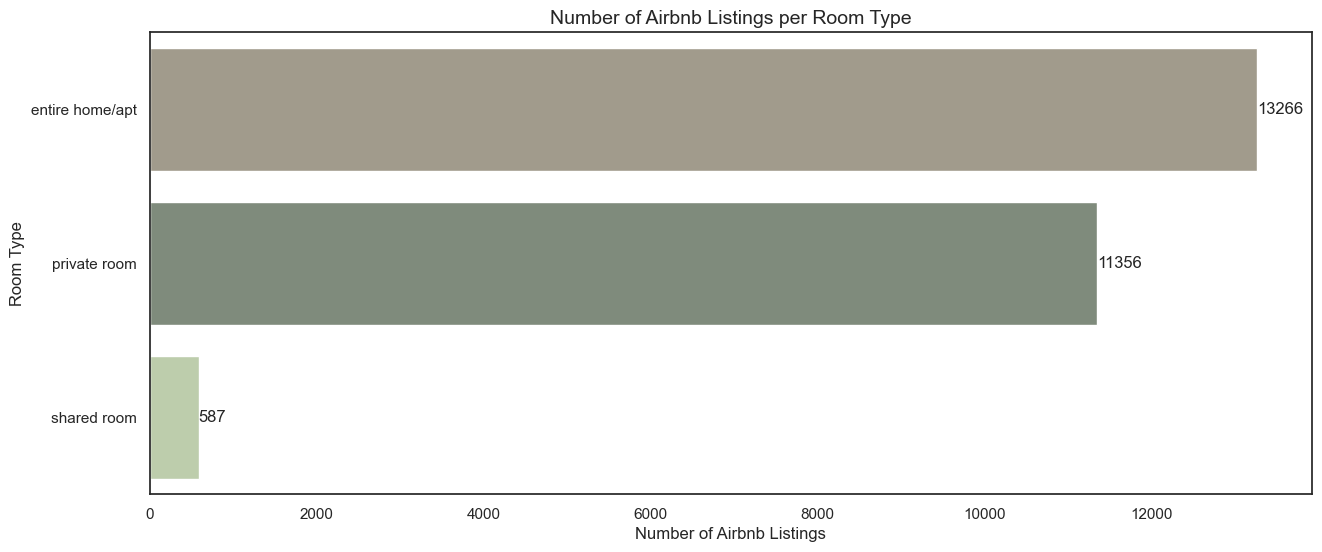

In [54]:
# Counting the number of listings per room type
sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (15, 6))
ax = sns.countplot(data = room_types, y = 'room_type', palette = {'entire home/apt' : '#a49d89', 'private room' : '#7e8d7a', 'shared room' : '#bdd2a7'})
ax.bar_label(ax.containers[0])
plt.title('Number of Airbnb Listings per Room Type', size = 14)
plt.xlabel('Number of Airbnb Listings')
plt.ylabel('Room Type')
plt.show()

In [55]:
# Getting the percentages from total by room type
room_types['room_type'].value_counts(normalize = True)

entire home/apt    0.526241
private room       0.450474
shared room        0.023285
Name: room_type, dtype: float64

The previous count plot shows that the room type which has the most number of listings are 'entire home/apt', with more than 13,200 listings, accounting for 52% of the total's Airbnb listings in New York City, followed by 'private room' with 45% and 'shared room' with the remaining 2%.

###  Finding out the earliest and latest review dates in the DataFrame

After setting up the correct data type of `last_review` in the cleaning process, it is possible to get the earliest and latest review dates in the reviews dataset. 

In [56]:
# Earliest review
first_reviewed = last_reviews['last_review'].dt.date.min()
display(first_reviewed)

# Latest review
last_reviewed = last_reviews['last_review'].dt.date.max()
last_reviewed

datetime.date(2019, 1, 1)

datetime.date(2019, 7, 9)

The earliest date in the reviews dataset is January 1st, 2019, whereas the last reviewed listing ocurred on July 9th of the same year. 

### Finding out the prices by borough

To continue with the analysis, and find out the prices by borough, it is important to merge the three tables we have been using together. 

In [57]:
# Merging the tables
rooms_and_prices = prices_no_outliers.merge(room_types, on = 'listing_id', how = 'outer')
airbnb_merged = rooms_and_prices.merge(last_reviews, on = 'listing_id', how = 'outer')

# Dropping missing values (26 columns removed)
display(airbnb_merged.shape)
airbnb_merged.dropna(inplace = True)
display(airbnb_merged.shape)

# Checking for duplicates
airbnb_merged.duplicated().sum()


(25209, 8)

(25184, 8)

0

We can now understand the difference in listing prices between New York City boroughs. 

In [58]:
# Setting up a column of borough
airbnb_merged['borough'] = airbnb_merged['nbhood_full'].str.partition(sep = ', ')[0]

# Grouping by borough and calculating summary statistics (sum, mean, median, and count).
sum_stats_by_borough = airbnb_merged.groupby('borough')['price'].agg(['sum', 'mean', 'median', 'count'])
sum_stats_by_borough = sum_stats_by_borough.round(2)
sum_stats_by_borough = sum_stats_by_borough.sort_values('mean', ascending = False)
sum_stats_by_borough


,sum,mean,median,count
borough,,,,
Manhattan,1898417.0,184.04,149.0,10315
Brooklyn,1275250.0,122.02,95.0,10451
Queens,320715.0,92.83,70.0,3455
Staten Island,22974.0,86.04,71.0,267
Bronx,55156.0,79.25,65.0,696


To visualize this, we can create a box plot. As there are many outliers in the data (which consists of listings that have really high prices), we will remove them from this exercise to understand how most of the data is distributed according prices. 

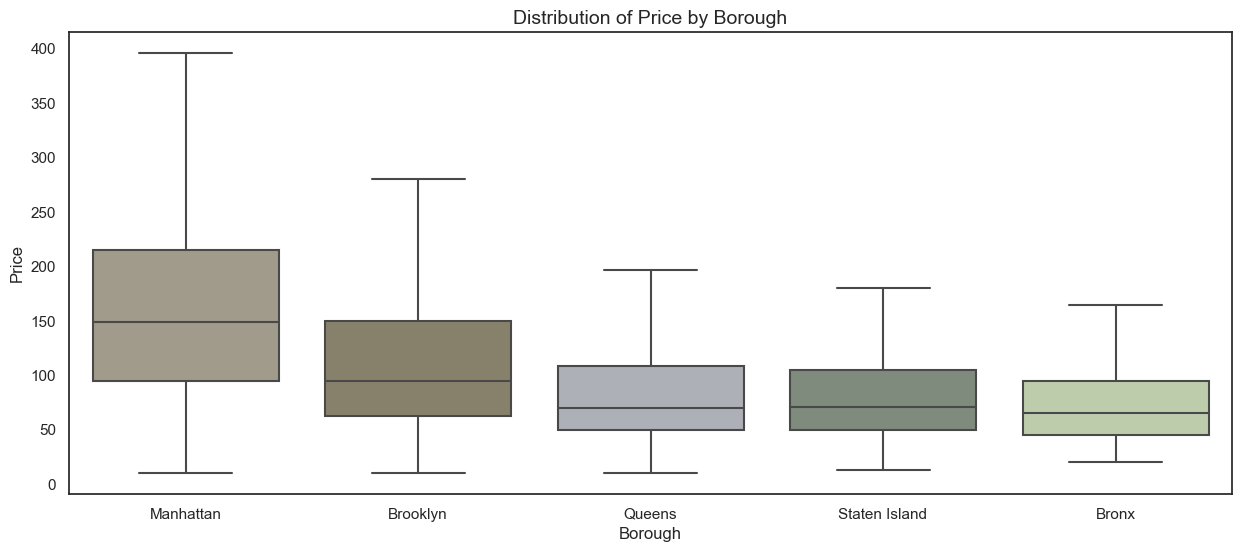

In [62]:
# Previewing the distribution of price in the five boroughs.
sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (15, 6))
sns.boxplot(data = airbnb_merged, x = 'borough', y = 'price', showfliers = False, palette = {'Manhattan' : '#a49d89', 'Brooklyn' : '#8c8367', 'Queens' : '#acafba', 'Staten Island' : '#7e8d7a', 'Bronx' : '#bdd2a7'})
plt.title('Distribution of Price by Borough', size = 14)
plt.xlabel('Borough')
plt.ylabel('Price')
plt.show()

We can se that Manhattan is the borough that tends to have a wider range in prices, compared to the other four boroughs, as well as the highest median price. Bronx, on the other hand, has the narrower range in prices, with the lowest median price. 

Finally, in order to preview the number of listings in with a high or low price, we can create labels 'Budget', 'Average', 'Expensive' and 'Extravagant'. 

In [66]:
# Grouping the airbnb_merged DataFrame by borough and price_range and calculate the count foreach label

label_names = ["Budget", "Average", "Expensive", "Extravagant"]
bins = [0, 69, 175, 350, np.inf]
airbnb_merged['price_range'] = pd.cut(airbnb_merged['price'], labels= label_names, bins = bins)

prices_by_borough = airbnb_merged.groupby(["borough", "price_range"])["price_range"].count().reset_index(name = 'count')
prices_by_borough

,borough,price_range,count
0,Bronx,Budget,381
1,Bronx,Average,285
2,Bronx,Expensive,25
3,Bronx,Extravagant,5
4,Brooklyn,Budget,3194
5,Brooklyn,Average,5532
6,Brooklyn,Expensive,1466
7,Brooklyn,Extravagant,259
8,Manhattan,Budget,1148
9,Manhattan,Average,5285


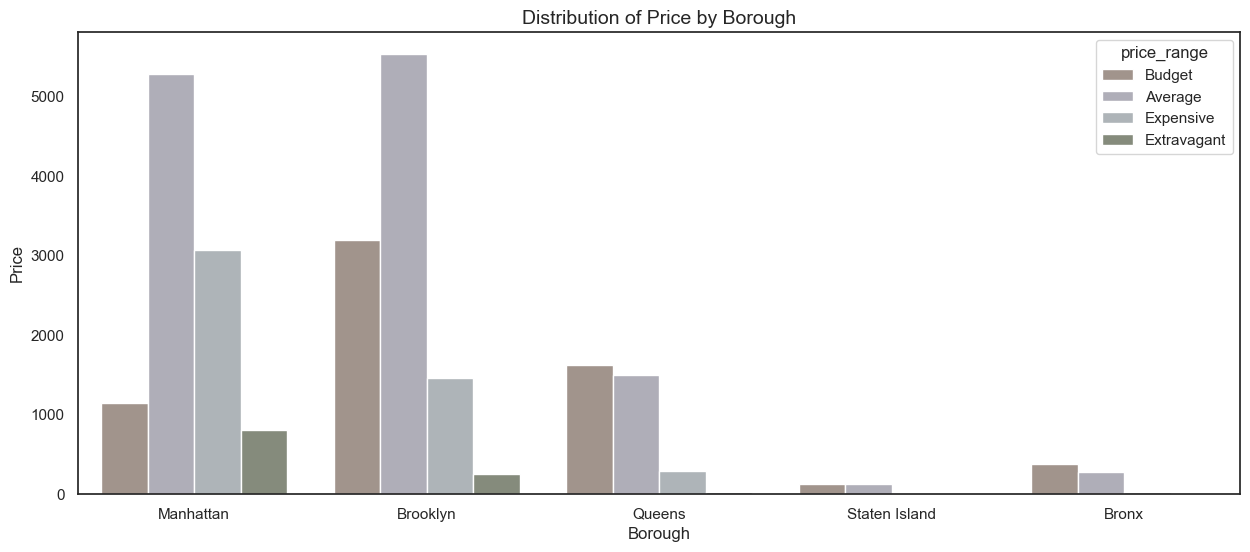

In [82]:
# Previewing the number of listings by borough per price range
sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (15, 6))
sns.barplot(data = prices_by_borough, x = 'borough', y = 'count', hue = 'price_range', estimator = 'sum', ci = None, palette = {'Budget': '#a49389', 'Average' : '#aeacba', 'Expensive' : '#acb4ba', 'Extravagant' : '#858d7a'}, order = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'])
plt.title('Distribution of Price by Borough', size = 14)
plt.xlabel('Borough')
plt.ylabel('Price')
plt.show()

In [61]:
# Generating the solution
airbnb_analysis = {'avg_price' : avg_price, 'average_price_per_month' : average_price_per_month, 'difference' : difference, 'room_frequencies' : room_frequencies, 'first_reviewed' : first_reviewed, 'last_reviewed' : last_reviewed, 'prices_by_borough' : prices_by_borough}
airbnb_analysis

{'avg_price': 141.82,
 'average_price_per_month': 4313.61,
 'difference': 1213.61,
 'room_frequencies': entire home/apt    13266
 private room       11356
 shared room          587
 Name: room_type, dtype: int64,
 'first_reviewed': datetime.date(2019, 1, 1),
 'last_reviewed': datetime.date(2019, 7, 9),
 'prices_by_borough': borough        price_range
 Bronx          Budget          381
                Average         285
                Expensive        25
                Extravagant       5
 Brooklyn       Budget         3194
                Average        5532
                Expensive      1466
                Extravagant     259
 Manhattan      Budget         1148
                Average        5285
                Expensive      3072
                Extravagant     810
 Queens         Budget         1631
                Average        1505
                Expensive       291
                Extravagant      28
 Staten Island  Budget          124
                Average         123

We can conclude that the boroughs which have the highest number of listings are Manhattan and Brooklyn. However, even though it is possible to find high numbers of listings that are priced at an 'Average' range, there are aso significant number of listings that are charged at an 'Expensive' and even 'Extravagant' range. 